In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  
from scipy.stats import circmean, circstd


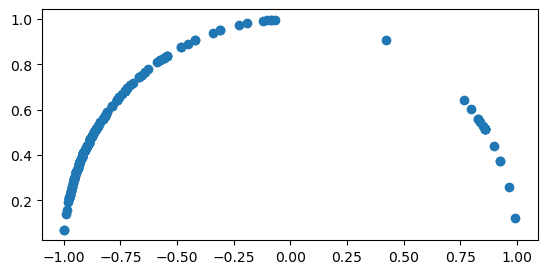

In [46]:
angles = pd.read_csv('angle_roi_0.csv', header=None).to_numpy().flatten()
angles = angles[angles != 0]
angles_rad = angles*np.pi/180
plt.plot(np.cos(angles_rad), np.sin(angles_rad), 'o', lw = 0.1)
# Get the current axes
ax = plt.gca()

# Set the aspect ratio of the axes
ax.set_aspect(1)

plt.show()

/home/roland/Schreibtisch/Capstone/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: mean = 147.9638036387163, std = 17.325835715127578
Cluster 1: mean = 30.43981367709798, std = 11.4411997952913


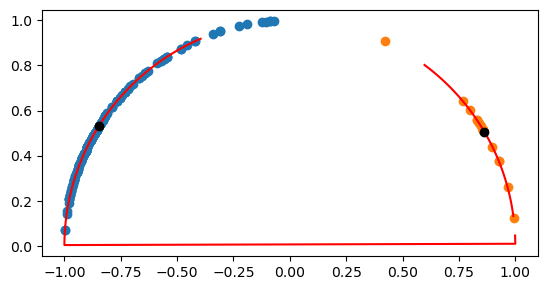

In [47]:
points = np.column_stack([np.cos(angles_rad), np.sin(angles_rad)])

kmeans = KMeans(n_clusters=2).fit(points)
labels = kmeans.labels_
for i in range(2):
    plt.plot(points[labels == i, 0], points[labels == i, 1], 'o')
for i in np.unique(labels):
    cluster_angles = angles_rad[labels == i]
    mean = np.rad2deg(circmean(cluster_angles, high=np.pi, low=0))
    std = np.rad2deg(circstd(cluster_angles, high=np.pi, low=0))
    print(f'Cluster {i}: mean = {mean}, std = {std}')
    tmp = np.linspace(mean-2*std, mean+2*std, 100)*np.pi/180
    tmp = np.fmod(tmp, np.pi)
    plt.plot(np.cos(tmp), np.sin(tmp), 'red')
    plt.plot(np.cos(mean*np.pi/180), np.sin(mean*np.pi/180), 'o', color='black')
    
ax = plt.gca()

# Set the aspect ratio of the axes
ax.set_aspect(1)

plt.show()

In [48]:
def find_cluster(angles_rad, n_clusters, min_diff_rad=0, angle_max=np.pi, print_=False):
    angles_rad = np.fmod(angles_rad, np.pi)
    angles_rad = angles_rad[~np.isnan(angles_rad)]
    angles_rad = angles_rad.flatten().reshape(-1, 1)
    
    points = np.column_stack([np.cos(angles_rad), np.sin(angles_rad)])
    
    kmeans = KMeans(n_clusters=n_clusters).fit(points)
    labels = kmeans.labels_
    mean_arr = np.zeros(n_clusters)
    std_arr = np.zeros(n_clusters)
    perc_arr = np.zeros(n_clusters)
    plot_ = False
    if plot_:
        for i in range(n_clusters):
            plt.plot(points[labels == i, 0], points[labels == i, 1], 'o')
        ax = plt.gca()
        ax.set_aspect(1)
        plt.show()
    for i in np.unique(labels):
        cluster_angles_rad = angles_rad[labels == i]
        mean_arr[i] = circmean(cluster_angles_rad, high=angle_max, low=0)
        std_arr[i] = circstd(cluster_angles_rad, high=angle_max, low=0)
        perc_arr[i] = len(cluster_angles_rad)/len(angles_rad)
        if print_:
            print(f'Cluster {i}: mean = {mean_arr[i]*180/np.pi :.2f}, std = {std_arr[i]*180/np.pi :.2f}, percentage = {perc_arr[i]*100 :.2f}%')

    if min_diff_rad > 0:
        # Calculate the absolute difference between each mean and all other means
        diff_matrix = np.abs(mean_arr[:, None] - mean_arr)

        # Get the upper triangle of the matrix excluding the diagonal
        
        diff_matrix = np.triu(diff_matrix, k=1)
        diff_matrix[np.tril_indices(diff_matrix.shape[0])] = np.nan
        close_clusters = np.argwhere(diff_matrix < min_diff_rad)
        
        if n_clusters > 1 and len(close_clusters) > 0:
            if print_:
                print(f'clusters are too close together, reducing number of clusters from {n_clusters} to {n_clusters-1}')
            find_cluster(angles_rad=angles_rad, n_clusters=n_clusters-1, min_diff_rad=min_diff_rad, angle_max=angle_max, print_=print_)
        else:
            return angles_rad, labels, mean_arr, std_arr, perc_arr
    return angles_rad, labels, mean_arr, std_arr, perc_arr
        
        

/home/roland/Schreibtisch/Capstone/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


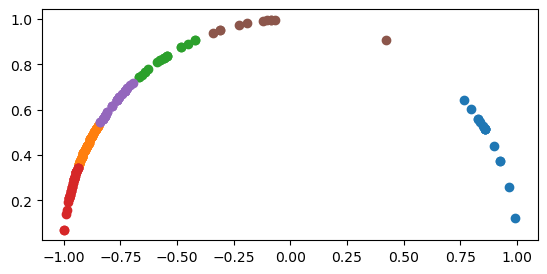

Cluster 0: mean = 28.70, std = 8.13, percentage = 8.99%
Cluster 1: mean = 153.65, std = 3.35, percentage = 33.71%
Cluster 2: mean = 124.31, std = 5.21, percentage = 11.24%
Cluster 3: mean = 164.93, std = 4.12, percentage = 20.79%
Cluster 4: mean = 141.12, std = 3.89, percentage = 19.10%
Cluster 5: mean = 98.01, std = 11.45, percentage = 6.18%
clusters are too close together, reducing number of clusters from 6 to 5


/home/roland/Schreibtisch/Capstone/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


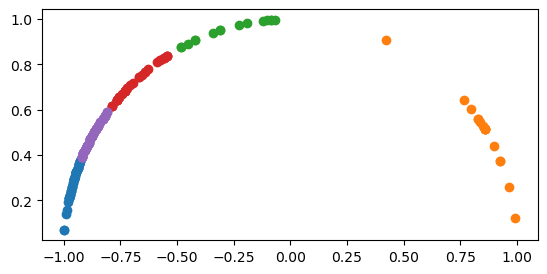

Cluster 0: mean = 163.68, std = 4.49, percentage = 25.84%
Cluster 1: mean = 30.44, std = 11.44, percentage = 9.55%
Cluster 2: mean = 106.13, std = 9.17, percentage = 8.43%
Cluster 3: mean = 133.58, std = 6.41, percentage = 20.22%
Cluster 4: mean = 151.30, std = 3.92, percentage = 35.96%
clusters are too close together, reducing number of clusters from 5 to 4


/home/roland/Schreibtisch/Capstone/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


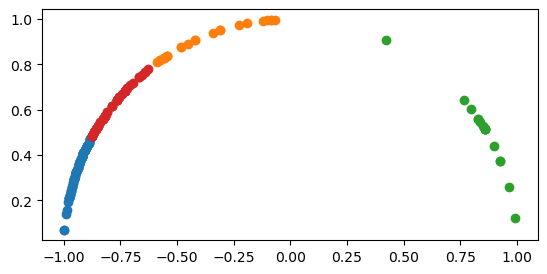

Cluster 0: mean = 159.96, std = 5.73, percentage = 43.82%
Cluster 1: mean = 113.02, std = 11.41, percentage = 13.48%
Cluster 2: mean = 30.44, std = 11.44, percentage = 9.55%
Cluster 3: mean = 142.82, std = 6.41, percentage = 33.15%
clusters are too close together, reducing number of clusters from 4 to 3


/home/roland/Schreibtisch/Capstone/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


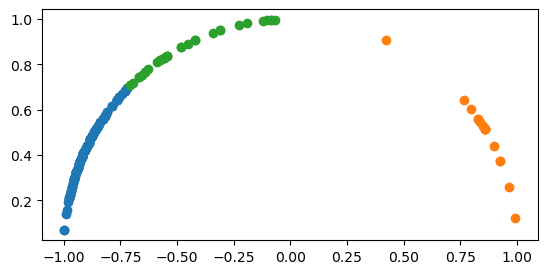

Cluster 0: mean = 153.89, std = 9.31, percentage = 72.47%
Cluster 1: mean = 30.44, std = 11.44, percentage = 9.55%
Cluster 2: mean = 117.82, std = 12.86, percentage = 17.98%


In [52]:
t = find_cluster(angles_rad, 3, print_=True, min_diff_rad = 20*np.pi/180)